In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/parkinsons.data')

In [ ]:
data_frame.shape

(195, 24)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data_frame.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print(data_frame.isnull().values.any())

False


In [ ]:
data_frame['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

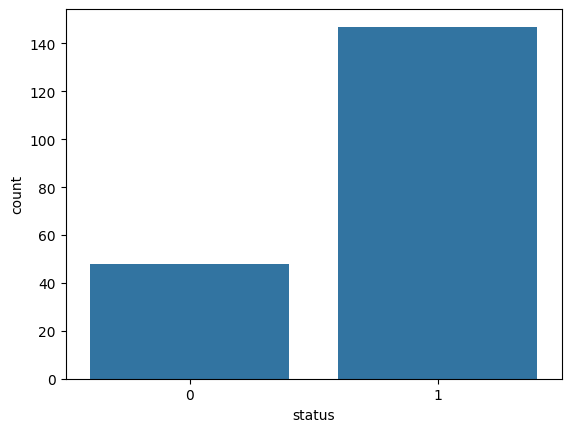

In [ ]:
sns.countplot(x ='status', data = data_frame)

In [ ]:
#iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parkinsons.data')
X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',    'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',  'NHR',  'HNR',  'RPDE', 'DFA',  'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=columns)

# Perform LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, y_train)

# Extract the coefficients for each feature
coefficients = lda.coef_

# Visualize the importance of each feature
feature_importance = pd.Series(coefficients.ravel(), index=columns).sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
Shimmer:APQ3        103277.920240
MDVP:RAP             13455.296160
MDVP:PPQ               596.972052
MDVP:Shimmer           434.969167
PPE                     19.041925
spread2                 13.930614
DFA                      5.194187
MDVP:Shimmer(dB)         2.070473
D2                       1.101826
spread1                  0.872576
MDVP:Fhi(Hz)            -0.002700
MDVP:Flo(Hz)            -0.016838
MDVP:Fo(Hz)             -0.031892
HNR                     -0.171517
RPDE                   -11.235491
NHR                    -26.465545
MDVP:APQ               -28.002352
Shimmer:APQ5          -435.480452
Jitter:DDP           -2975.288508
MDVP:Jitter(%)       -3075.937051
MDVP:Jitter(Abs)    -33776.455729
Shimmer:DDA         -34515.805442
dtype: float64


In [ ]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=2aa3501e24f49b5d5393fd2a7a75603d8b9585a79d84d8d6f72883df09851907
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import lime
from lime import lime_tabular

In [ ]:
import shap

# boosting ensemble technique : Boosting is an ensemble technique that combines multiple weak learners to create a strong learner. Unlike bagging, boosting trains models sequentially, with each model giving more weight to instances that the previous models misclassified.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base Decision Tree classifier (a weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the hyperparameters

# Create an AdaBoost classifier using the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='classification', feature_names=X.columns, class_names=['Negative Class', 'Positive Class'])

# Explain the prediction for a specific instance (e.g., the first test instance)
explanation = explainer.explain_instance(X_test.values[0], adaboost_classifier.predict_proba, num_features=len(X_train.columns), top_labels=1)

# Visualize the LIME explanation
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [ ]:
explainer = shap.KernelExplainer(adaboost_classifier.predict, X_train)
shap_values = explainer(X)

  0%|          | 0/195 [00:00<?, ?it/s]

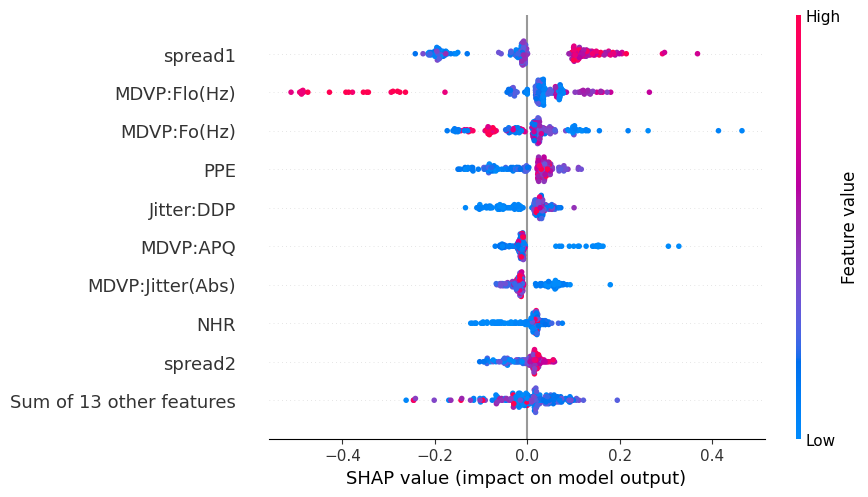

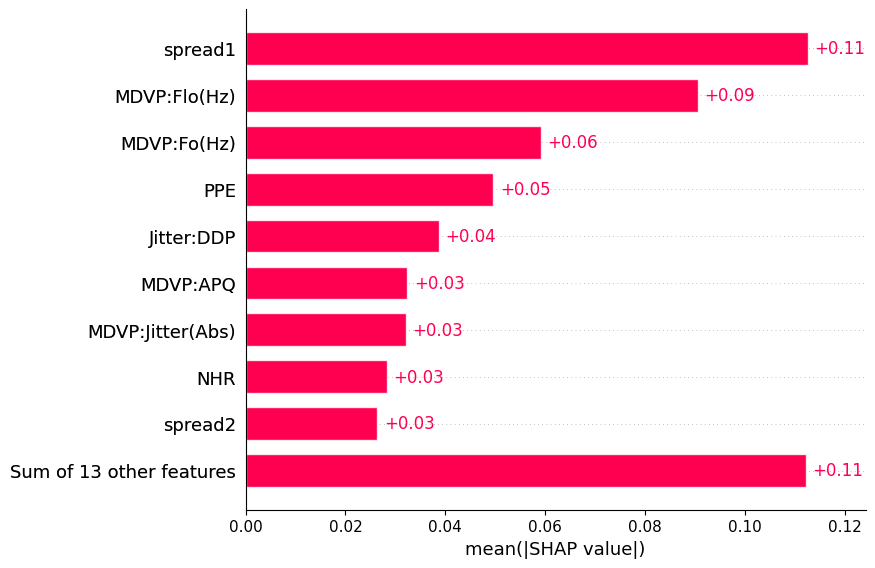

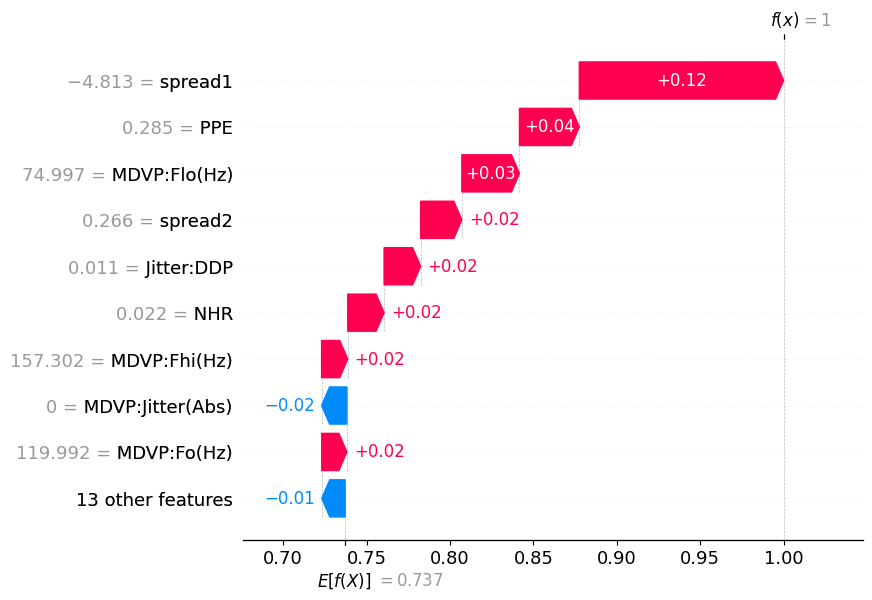

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])

# Stacking is an ensemble learning technique that combines the predictions of multiple models by training a meta-model on top of their outputs.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier


X = data_frame.drop('status', axis=1)
X = X.drop('name', axis=1)
y = data_frame['status']


feature_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',	'MDVP:Shimmer',	'MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA',	'NHR',	'HNR',	'RPDE',	'DFA',	'spread1', 'spread2', 'D2', 'PPE']

columns = feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)
stacking_model = stacking_classifier.fit(X_train, y_train)

In [ ]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='classification', feature_names=X.columns, class_names=['Negative Class', 'Positive Class'])

# Explain the prediction for a specific instance (e.g., the first test instance)
explanation = explainer.explain_instance(X_test.values[0], stacking_model.predict_proba, num_features=len(X_train.columns), top_labels=1)

# Visualize the LIME explanation
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
explainer = shap.KernelExplainer(stacking_model.predict, X_train)
shap_values = explainer(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/195 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWa

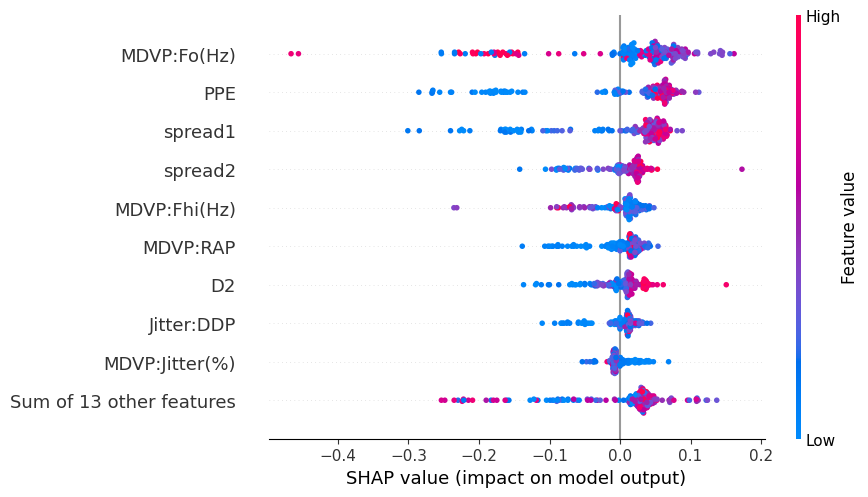

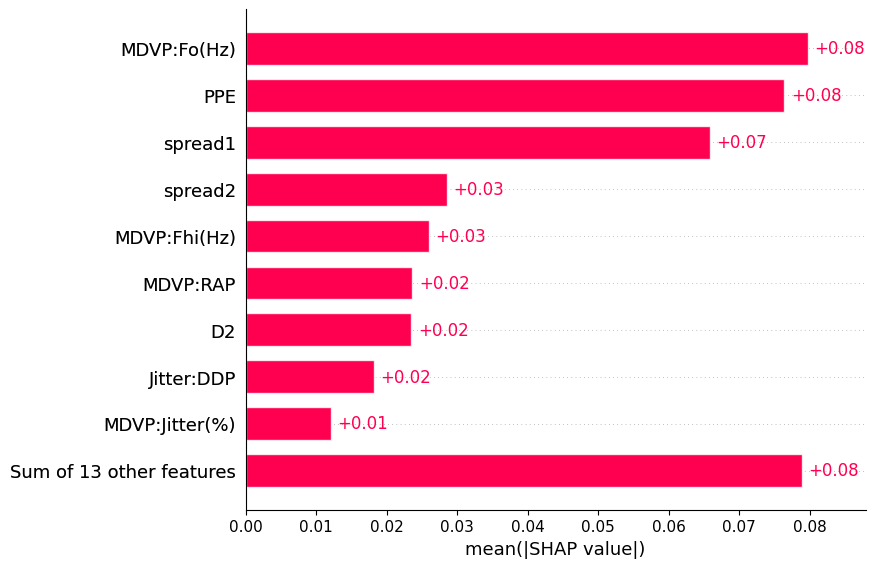

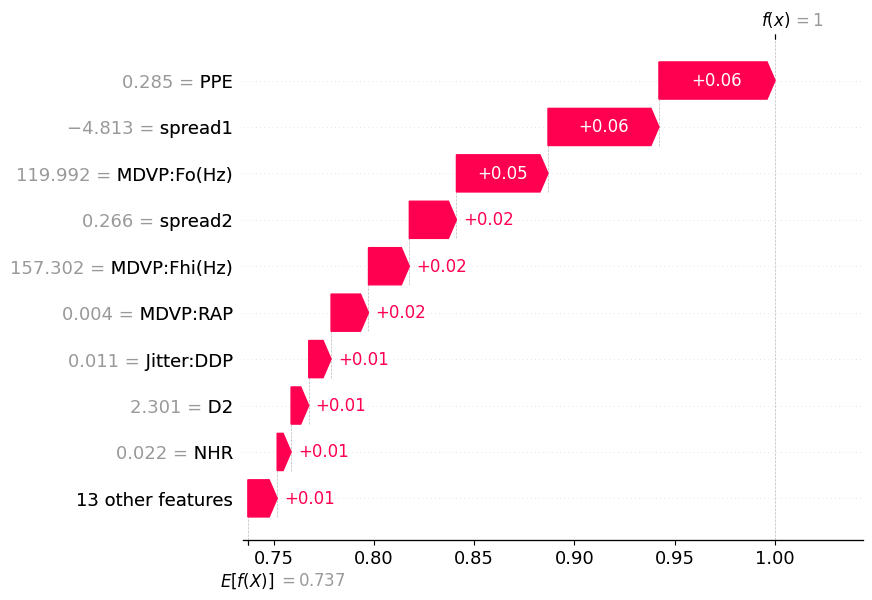

In [ ]:
shap.plots.force(shap_values[0])
shap.plots.beeswarm(shap_values)

shap.plots.bar(shap_values)

shap.plots.waterfall(shap_values[0])